In [1]:
import warnings   
warnings.simplefilter("ignore") 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
%matplotlib notebook

import sys
sys.path.append('/Users/Serene/git/Amnon/calour')
import calour as cl
import numpy as np
import pandas as pd

from scipy.stats import sem
import pickle

cl.set_log_level(40) 

## CFS data 

In [5]:
with open("../results/cfs_filtering_updated.pkl", "wb") as f:
    pickle.dump((filtlev, sig_bh_cfs, sig_ds_cfs), f)

In [2]:
cfs = cl.read_amplicon('../data/cfs.biom','../data/cfs.map.txt', sparse=False, filter_reads=1000, normalize=10000)

In [3]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
B=100

sig_ds_cfs = []
sig_bh_cfs = []
for i in filtlev:
    print('filter level...: %s' %(i))
    
    sig_ds = []
    sig_bh = []
    for j in range(B):
        cfs_sub = cfs.filter_min_abundance(i)
        ds_cfs = cfs_sub.diff_abundance('Subject','Control','Patient', fdr_method='dsfdr')
        bh_cfs = cfs_sub.diff_abundance('Subject','Control','Patient', fdr_method='bhfdr')
        sig_ds.append(len(ds_cfs.feature_metadata.index))
        sig_bh.append(len(bh_cfs.feature_metadata.index))
        
    sig_ds_cfs.append(np.mean(sig_ds))   
    sig_bh_cfs.append(np.mean(sig_bh))  

filter level...: 0
filter level...: 1
filter level...: 2
filter level...: 3
filter level...: 4
filter level...: 5
filter level...: 6
filter level...: 7
filter level...: 8
filter level...: 9
filter level...: 10
filter level...: 20
filter level...: 30
filter level...: 40
filter level...: 50
filter level...: 60
filter level...: 70
filter level...: 80
filter level...: 90
filter level...: 100
filter level...: 200
filter level...: 300
filter level...: 400
filter level...: 500


<IPython.core.display.Javascript object>


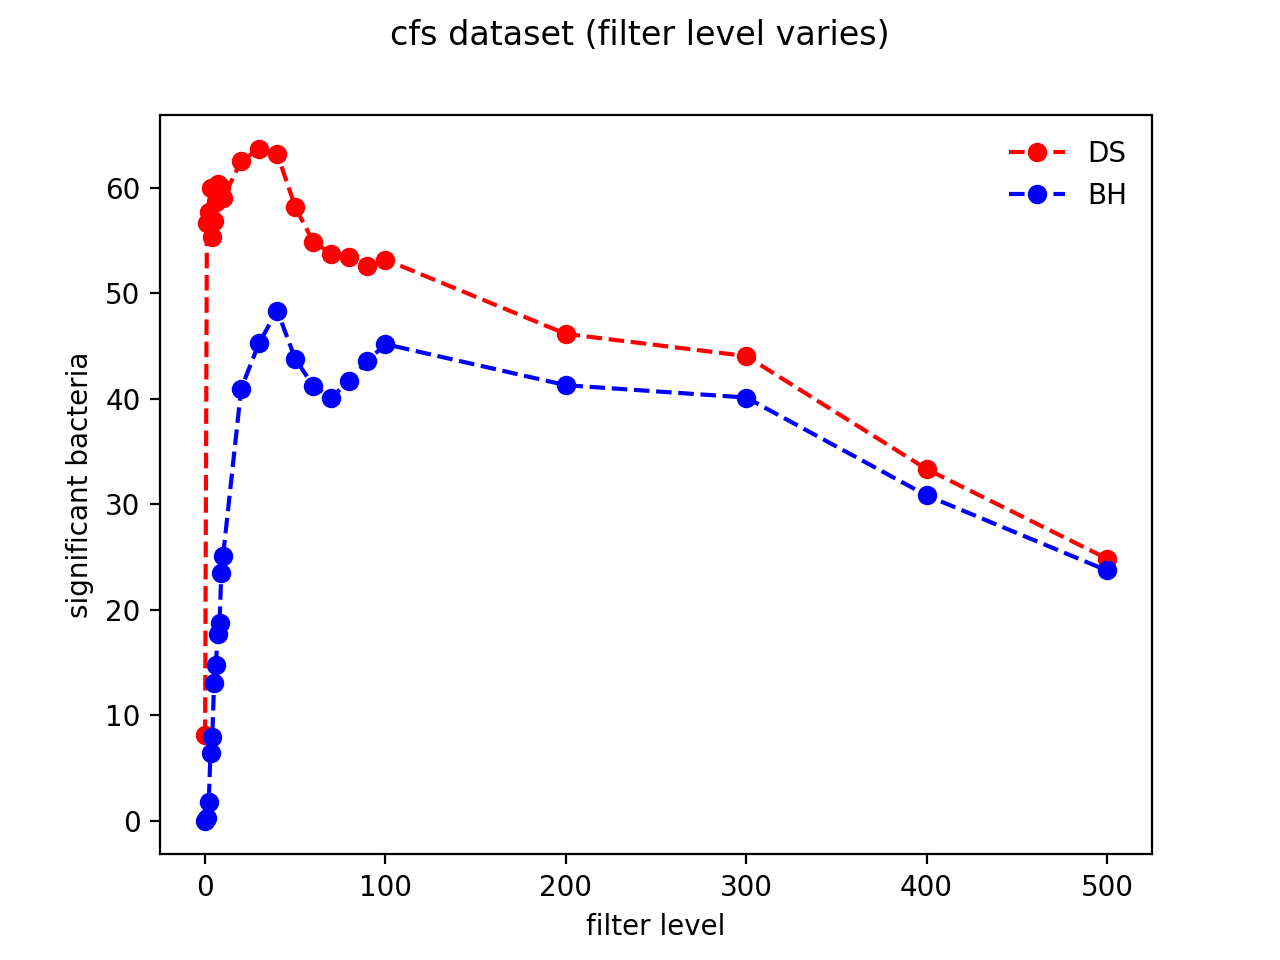

In [4]:
plt.figure()
plt.plot(filtlev, sig_ds_cfs, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev, sig_bh_cfs, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('cfs dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


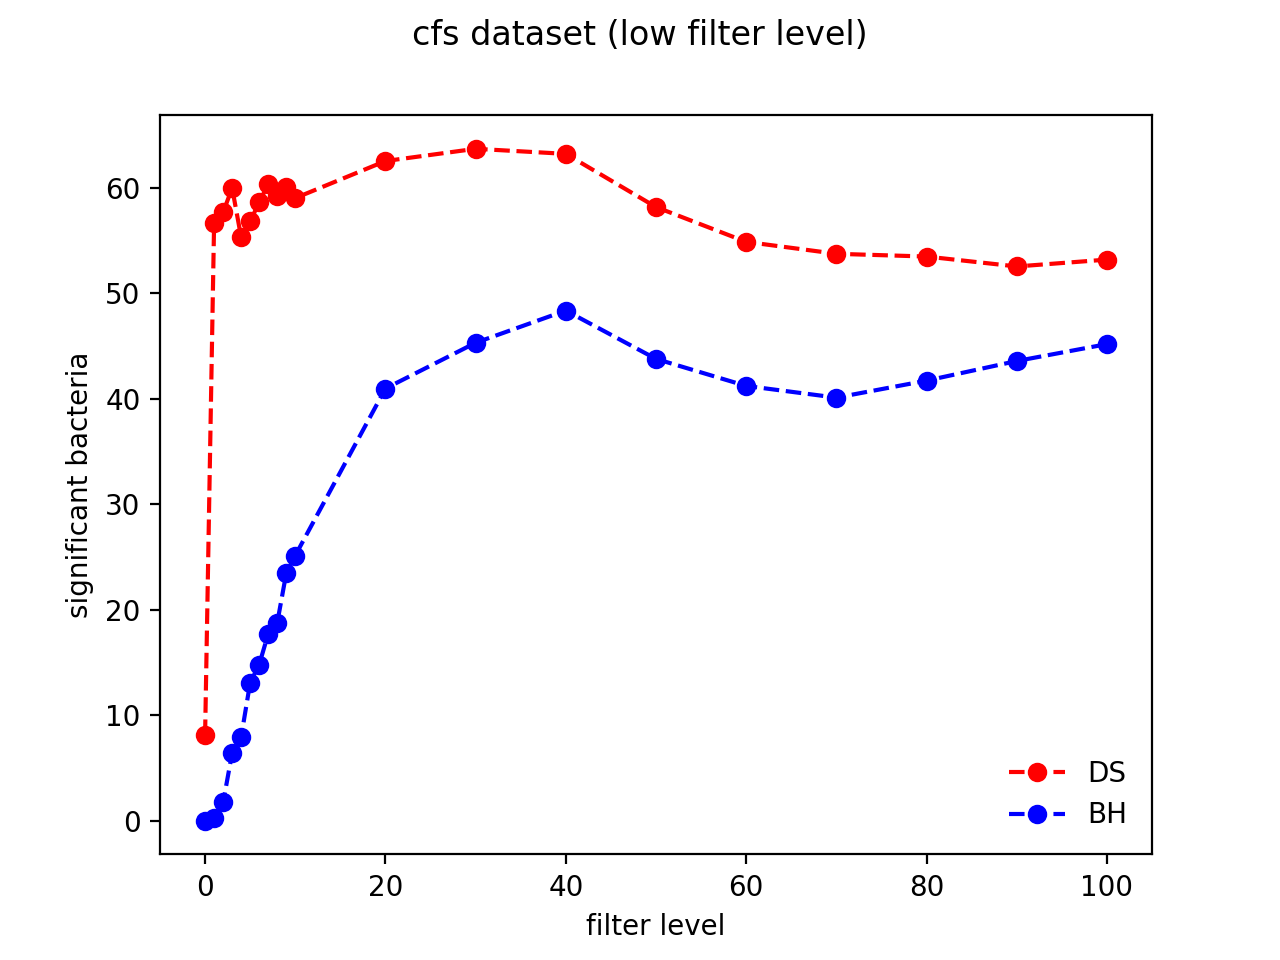

In [6]:
plt.figure()
plt.plot(filtlev[0:20], sig_ds_cfs[0:20], linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev[0:20], sig_bh_cfs[0:20], linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc = 4, frameon=False)
plt.suptitle('cfs dataset (low filter level)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')

## Mice Lacking Toil-like Receptor (Qitta ID: 460)

In [17]:
with open("../results/mlt_filtering_updated.pkl", "wb") as f:
    pickle.dump((filtlev, sig_bh_mlt, sig_ds_mlt), f)

In [13]:
mlt = cl.read_amplicon('../data/mlt.biom','../data/mlt.map.txt', sparse=False, filter_reads=1000, normalize=10000)

In [14]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
B=100

sig_ds_mlt = []
sig_bh_mlt = []
for i in filtlev:
    print('filter level...: %s' %(i))
    
    sig_ds = []
    sig_bh = []
    for j in range(B):
        mlt_sub = mlt.filter_min_abundance(i)
        ds_mlt = mlt_sub.diff_abundance('Description','mouse cecum, TLR5 knockout',
                                    'mouse cecum, wild type', fdr_method='dsfdr')
        bh_mlt = mlt_sub.diff_abundance('Description','mouse cecum, TLR5 knockout',
                                    'mouse cecum, wild type', fdr_method='bhfdr')
        sig_ds.append(len(ds_mlt.feature_metadata.index))
        sig_bh.append(len(bh_mlt.feature_metadata.index))
        
    sig_ds_mlt.append(np.mean(sig_ds))   
    sig_bh_mlt.append(np.mean(sig_bh))  

filter level...: 0
filter level...: 1
filter level...: 2
filter level...: 3
filter level...: 4
filter level...: 5
filter level...: 6
filter level...: 7
filter level...: 8
filter level...: 9
filter level...: 10
filter level...: 20
filter level...: 30
filter level...: 40
filter level...: 50
filter level...: 60
filter level...: 70
filter level...: 80
filter level...: 90
filter level...: 100
filter level...: 200
filter level...: 300
filter level...: 400
filter level...: 500


<IPython.core.display.Javascript object>


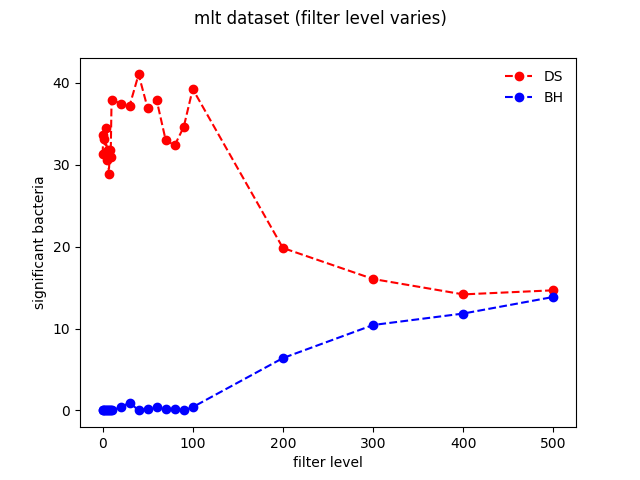

In [15]:
plt.figure()
plt.plot(filtlev, sig_ds_mlt, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev, sig_bh_mlt, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('mlt dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


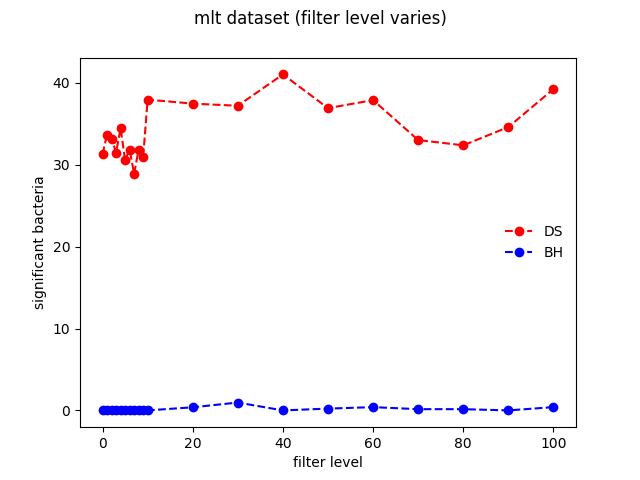

In [16]:
plt.figure()
plt.plot(filtlev[0:20], sig_ds_mlt[0:20], linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev[0:20], sig_bh_mlt[0:20], linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc =0, frameon=False)
plt.suptitle('mlt dataset (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')

## American Gut

In [2]:
ag = cl.read_amplicon('../data/ag.biom','../data/ag_fecals.map.txt',sparse=False, filter_reads=1000, normalize=10000)

In [3]:
filtlev = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]
B=10

sig_ds_aga = []
sig_bh_aga = []
sig_ds_agp = []
sig_bh_agp = []
for i in filtlev:
    print('filter level...: %s' %(i))
    
    sig_ds_a = []
    sig_bh_a = []
    sig_ds_p = []
    sig_bh_p = []
    for j in range(B):
        ag_sub = ag.filter_min_abundance(i)
        ds_aga = ag_sub.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                'Week', fdr_method='dsfdr')
        bh_aga = ag_sub.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                'Week', fdr_method='bhfdr')
        sig_ds_a.append(len(ds_aga.feature_metadata.index))
        sig_bh_a.append(len(bh_aga.feature_metadata.index))
        
        ds_agp = ag_sub.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5', fdr_method='dsfdr')
        bh_agp = ag_sub.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5', fdr_method='bhfdr')
        sig_ds_p.append(len(ds_agp.feature_metadata.index))
        sig_bh_p.append(len(bh_agp.feature_metadata.index))
        
    sig_ds_aga.append(np.mean(sig_ds_a))   
    sig_bh_aga.append(np.mean(sig_bh_a)) 
    sig_ds_agp.append(np.mean(sig_ds_p))   
    sig_bh_agp.append(np.mean(sig_bh_p))   

filter level...: 0
filter level...: 1
filter level...: 2
filter level...: 3
filter level...: 4
filter level...: 5
filter level...: 6
filter level...: 7
filter level...: 8
filter level...: 9
filter level...: 10
filter level...: 20
filter level...: 30
filter level...: 40
filter level...: 50
filter level...: 60
filter level...: 70
filter level...: 80
filter level...: 90
filter level...: 100
filter level...: 200
filter level...: 300
filter level...: 400
filter level...: 500


In [4]:
with open("../results/ag_filtering_v2.pkl", "wb") as f:
    pickle.dump((filtlev, sig_bh_aga, sig_ds_aga, sig_bh_agp, sig_ds_agp), f)

## Plant Number Subset

<IPython.core.display.Javascript object>


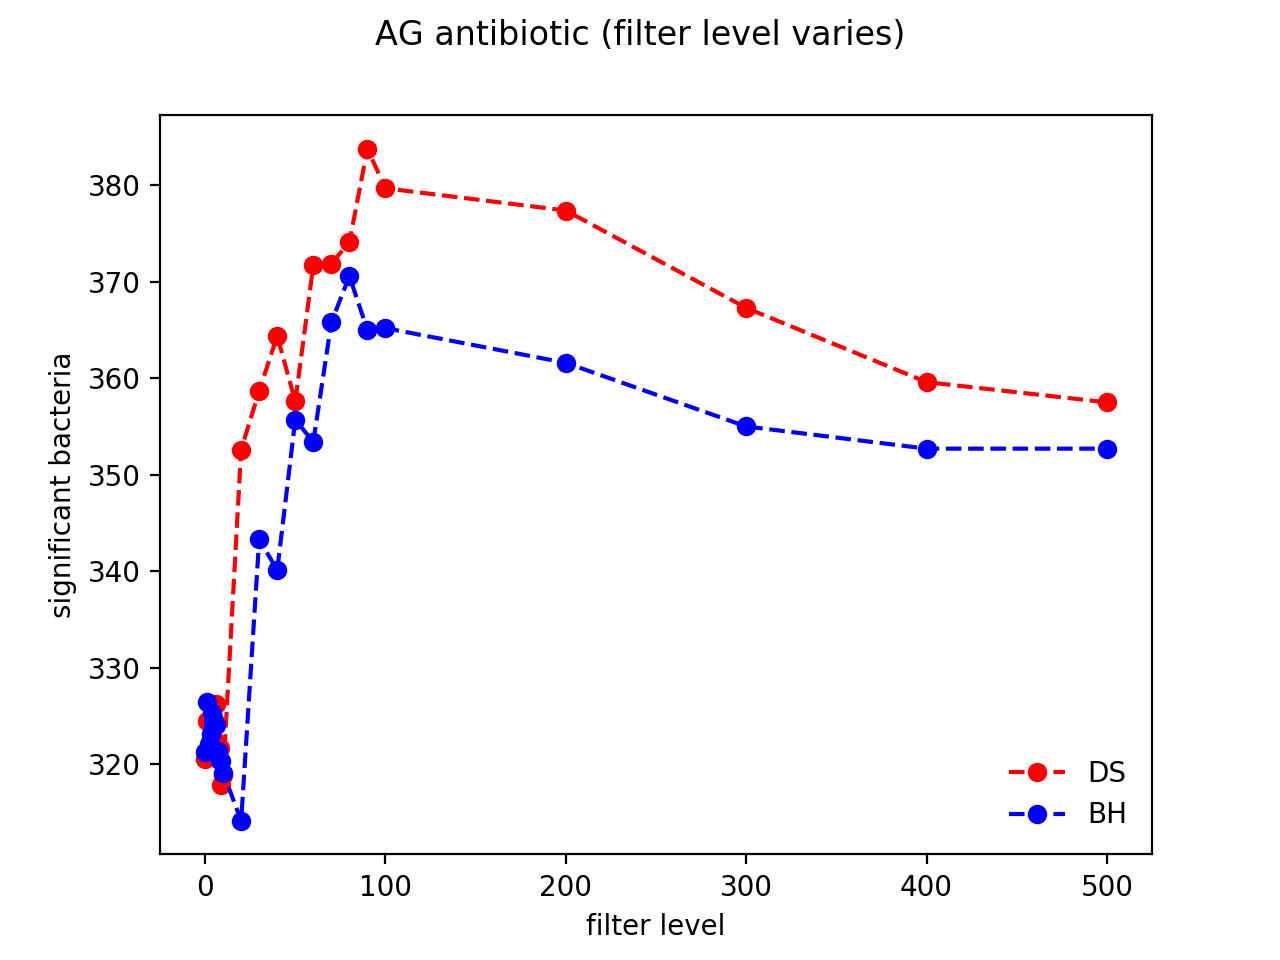

In [5]:
plt.figure()
plt.plot(filtlev, sig_ds_aga, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev, sig_bh_aga, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('AG antibiotic (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')  

## Antibiotic History Subset

<IPython.core.display.Javascript object>


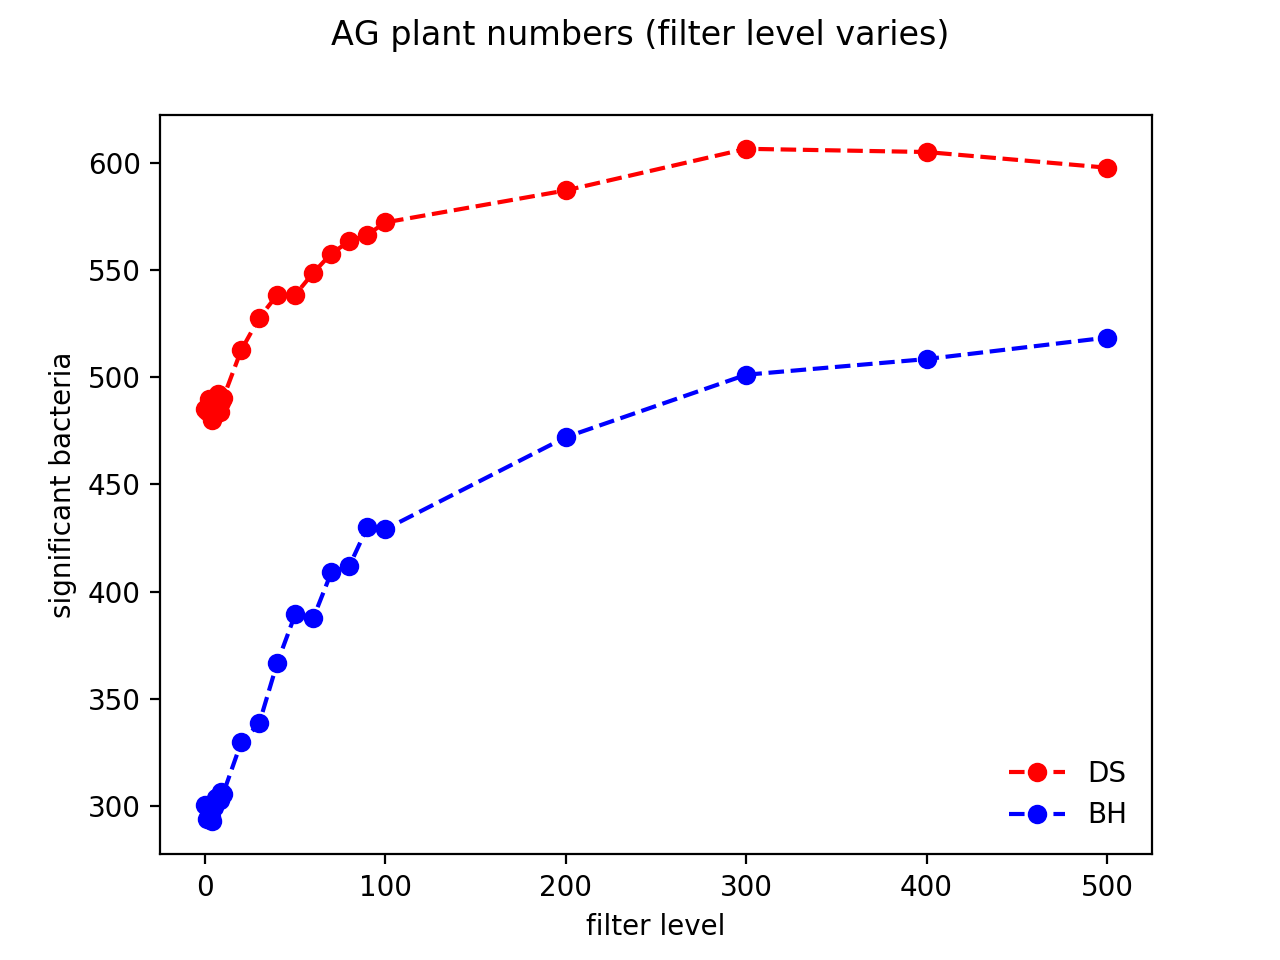

In [6]:
plt.figure()
plt.plot(filtlev, sig_ds_agp, linestyle='--', marker='o', color = 'red', label = 'DS')
plt.plot(filtlev, sig_bh_agp, linestyle='--', marker='o', color = 'blue', label = 'BH')
pylab.legend(loc ='lower right', frameon=False)
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('AG plant numbers (filter level varies)')
plt.xlabel('filter level')
plt.ylabel('significant bacteria')